# Outliers Detection & Handling

#####  Importing required libraries for reading data

In [1]:
import pandas as pd
import numpy as np

##### Reading Facebook Dataset

In [38]:
df=pd.read_csv("facebook_data.csv")
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

### Outliers Detection

##### From this dataset we'll work on outliers for age column

##### How to detect Outliers in a dataset ?
* There are multiple ways to detect outliers in a dataset. We'll go through few of them.
    * Using Statistics Method
        * 1. Standard Deviation & Mean
    * Using Visualization Tools
        * 2. Box Plot
        * 3. Scatter Plot
        * 4. Histogram
    * Using other Methods
        * 5. IQR (Inter Quartile Range)
        * 6. Z-Score
    * Using Tool
        * 7. DTALE (Though this is not a method, this is a PIP to be installed for profiling which can help you find outliers                other than providing you with lots of other data).
      
NOTE: Before going ahead and deciding on the value given by the above mentioned methods, it is advised to understand what the column denotes and whether the outlier value mentioned can be either increased or decreased accordingly.

##### Approach#1: Standard Deviation & Mean 
* Using Standard Deviation & Mean we can find outliers i.e., any data outside 3 Standard Deviations is an Outlier.
* So, in order to find out the outlier we'll calculate Mean, Standard Deviation, 3*StandardDeviation.
* Then, we'll add the 3 Standard Deviations to Mean to get the higher limit & subtract Mean from 3 Standard Deviations to find the lower limit.

In [25]:
import statistics as st
mean_age=st.mean(df['age'])
std_age=st.stdev(df['age'])
age_higherlimit=mean_age+std_age*3
age_lowerlimit=mean_age-std_age*3
print("The Mean Age is {}, it's Standard Deviation is {}, it's Higher Limit is {} & Lower Limit is {}".format(mean_age,std_age,age_higherlimit,age_lowerlimit))

The Mean Age is 37.28022383160106, it's Standard Deviation is 22.58974831325895, it's Higher Limit is 105.04946877137792 & Lower Limit is -30.48902110817579


##### Approach#2: Box Plot 
* Using box plot we can see a dark dots or sometimes dark line on either of the ends depending on the number of outlier points

###### Import seaborn package

In [3]:
import seaborn as sns

##### Box plot on Age

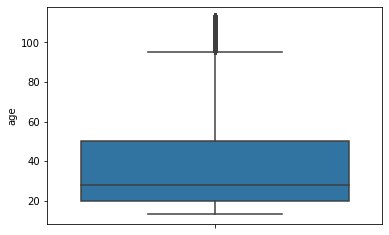

In [39]:
sns.boxplot(y="age",data=df)

* From the above plot we can say that there are outliers in age >95

##### Approach#3: Scatter Plot

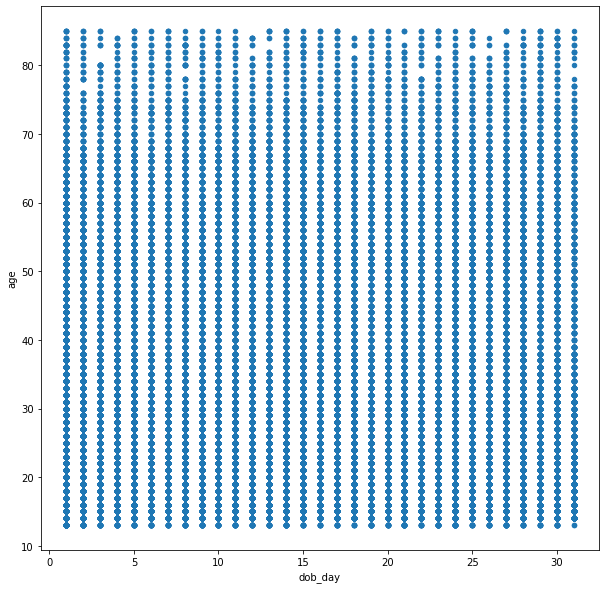

In [49]:
df.plot.scatter(y="age",x="dob_day",figsize=(10,10))

* From the above plot we can see that there are users above the age of 80 who are on Facebook which is a probable outlier.

##### Approach#4: Histogram

* From Histogram we can see whether it is left skewed or right skewed which helps us identify on which side we've outliers. Here, outlier detection should happen based on understanding of what that column represents and are those values possible in real.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018412421B50>]],
      dtype=object)

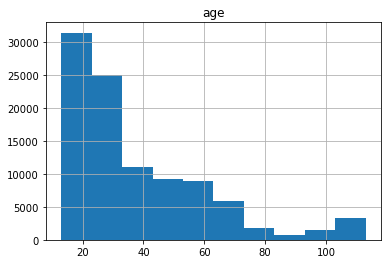

In [6]:
df.hist(['age'])

* From the above histogram plot, we can see that there are datapoints where age >95 which is not possible in this case of users on Facebook. Hence, this can be treated as outlier.

##### Approach#5: IQR (Inter Quartile Range)

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)
lower_range=lower_range.astype(int)
upper_range=upper_range.astype(int)
print("The Low range Age value is: {} and the High range age value is: {}".format(lower_range['age'],upper_range['age']))

The Low range Age value is: -25 and the High range age value is: 95


* The above code gives low range & high range values for all columns of dataframe. We've fetched data for age which we are interested in.

* To fetch data for specific columns we've also created a function as shown below, which can be used on any dataframe and it's column

In [8]:
def outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

* Calling the above created function on our dataset for age & dob_year columns

In [9]:
lowage,highage=outlier(df['age'])
lowage,  highage

(-25.0, 95.0)

In [10]:
df[(df['age'] >95)|(df['age'] < -25)]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1693,1942772,97,15,1916,11,male,613.0,0,0,0,0,0,0,0,0
1694,1226208,100,1,1913,12,female,171.0,0,0,0,0,0,0,0,0
1695,2192316,107,22,1906,5,male,242.0,0,0,0,0,0,0,0,0
1696,2100908,108,26,1905,3,male,109.0,0,0,0,0,0,0,0,0
1778,1973211,108,6,1905,6,male,6.0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98895,2008877,108,23,1905,4,male,1587.0,2460,1158,2753,593,2694,327,59,266
98903,2085281,96,28,1917,6,male,999.0,3738,1705,2952,3857,2223,2709,729,1148
98923,1761484,103,18,1910,3,female,560.0,3018,547,5595,1926,586,810,5009,1116
98934,2115451,108,18,1905,5,female,954.0,3982,1190,6016,4012,1180,2816,4836,1196


##### Approach#6: Z-Score

In [11]:
from scipy import stats
age_outliers=np.abs(stats.zscore(df['age']))
age_outliers_gt=np.where(age_outliers > 3)
age_outliers_lt=np.where(age_outliers < -3)

In [12]:
for i in age_outliers_gt:
    print(df.iloc[i,1])

1695     107
1696     108
1778     108
3132     107
3133     108
        ... 
98775    108
98886    108
98895    108
98934    108
98975    107
Name: age, Length: 2146, dtype: int64


In [13]:
for i in age_outliers_lt:
    print(df.iloc[i,1])

Series([], Name: age, dtype: int64)


##### Approach#7: DTALE

* Instal DTALE PIP as shown below

In [14]:
pip install -dtale

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: -d


* Import DTALE & use it on our dataset as shown below

In [15]:
import dtale
dt=dtale.show(df)
dt

* From the above output, left-click on the arrow on top left corner and click on "Highlight Outliers" from the drop-down which highlights the fields in which Outliers exist.
* From the above output, left-click on the arrow on top left corner and click on "Describe", which opens up in a new window with stats for every column. Click on each and every column and you can see stats for that column along with Unique Values & Outlier values.

### Outliers Handling

* Outliers handling can be done in two ways as mentioned below: 
    
    Approach#1. Correcting Outliers -- In this method we'll be updating the value of the outlier column with a value which is                   either the Higher Limit or Lower Limit of that particular column.
    
    Approach#2. Removing Outliers -- In this method we'll be removing the outlier datapoints which we've identified above. In                   this method that shape of dataset will be reduced as we'll be removing outlier data rows from our analysis.

* Approach#1: Correcting Outliers

* We can use any of the above used methods for detecting outliers to correct them as well. Here, we will use the IQR function created to find outliers using IQR method & correct them.

In [34]:
lowage,highage=outlier(df['age'])
df['age']=np.where(df['age']>highage,highage,df['age'])
df['age']=np.where(df['age']<lowage,lowage,df['age'])

* Let us plot a box plot to see if outliers still exist in Age column of the dataset

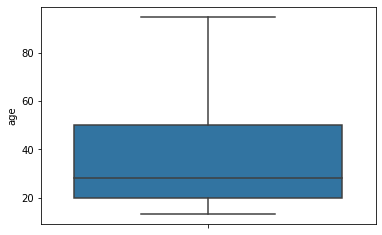

In [36]:
sns.boxplot(y="age",data=df)

* From the above plot we can see that Outliers are removed successfully.

* Approach#2: Removing Outliers

* For removal of Outliers also we can use any of the above mentioned Outlier Detection methods. Here, we'll use IQR method to remove outliers by calling the Outlier function.

In [47]:
lowage,highage=outlier(df['age'])
df.drop(df[(df['age'] < lowage) | (df['age'] >highage)].index, inplace = True) 

* Let us plot a box plot to see if outliers still exist in Age column of the dataset

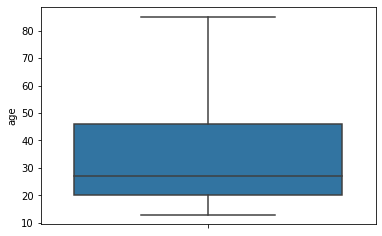

Executing shutdown due to inactivity...


2020-11-04 11:47:44,604 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-11-04 11:47:48,691 - INFO     - Executing shutdown...


In [48]:
sns.boxplot(y="age",data=df)